In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import plotly.express as px 
import plotly.io as pio 
pio.renderers.default = "notebook_connected"
from matplotlib import style
style.use('ggplot')
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('waveforms.csv',index_col='uid')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,organoid
uid,,,,,,,,,,,,,,,,,,,,,
VT007_066B,0.004044,0.003251,0.002699,0.000933,0.002498,0.001318,0.001767,0.001549,0.000162,0.001326,...,0.024270,0.023840,0.020905,0.020403,0.020539,0.023448,0.022874,0.021579,0.020398,DLX_Cheriff
VT007_065C,-0.005810,-0.009174,-0.007123,-0.000439,0.012535,0.010292,-0.008518,-0.003850,-0.008281,-0.002272,...,-0.004725,-0.006430,-0.009813,-0.009649,-0.015493,-0.001762,0.005104,0.007174,0.013310,DLX_Cheriff
VT007_049D,0.001364,-0.001753,-0.002771,-0.000469,0.002283,-0.001358,-0.002479,0.001449,0.003146,0.001852,...,0.020981,0.021550,0.019937,0.018697,0.017463,0.016347,0.017435,0.019199,0.018944,DLX_Cheriff
VT000_028B,0.013311,0.064860,0.040174,0.030857,0.017304,0.005566,-0.016336,0.029163,0.081317,0.031946,...,-0.041384,-0.006413,-0.004356,-0.028679,0.036181,0.038117,0.007865,-0.055905,-0.015489,DLX_Cheriff
VT000_010C,-0.021218,-0.009185,-0.018137,-0.010929,-0.015134,-0.018428,-0.011607,-0.016257,-0.014727,-0.020521,...,-0.013157,0.006647,-0.004224,-0.013971,0.000640,0.001861,0.007422,0.016685,0.008856,DLX_Cheriff


In [3]:
print('Number of columns:', len(df.columns))

Number of columns: 151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, VT007_066B to AP026R_054G
Columns: 151 entries, 0 to organoid
dtypes: float64(150), object(1)
memory usage: 879.9+ KB


In [5]:
##Better plotting make a list of colors for each data in the organoid column
mycolors = {'TSCp5_30s':     '#FFA500', # orange
          'TSCp5_32s':       '#4169E1', # royalblue
          'DLX_bluered':     '#DAA520', # goldenrod 
          'DLX_Cheriff':     '#228B22', # forestgreen
          'DLX_H9' :         '#006400', # darkgreen 
          'AP_ctrl':         '#00BFFF', # deepskyblue 
          'AP_drug':         '#DC143C'  # crimson
            }


In [6]:
df1  = df.copy()

In [7]:
#add color to the dataframe
df1['color'] = df1['organoid'].map(mycolors)

In [8]:
def plot_waveform(index, color= True, ax = None):
    """
    Returns an axis with the normalized waveform,
    together with its color and tissue name. It 
    requires trace (2D NumPy array with the vectors
    of spikes) and waveforms (pandas DataFrame).
    
    Arguments
    ---------
    index (int)
        the index of the waveform to be selected in the
        Pandas object.
    color (bool)
        If the default waveform color is plotted (default true)
    ax (matplotlib axis object)
        If None, use current axis object
    """
    
    myax = ax or plt.gca()
    
    # waveforms is a DataFrame and must be previously defined
    df = df1.drop(['organoid', 'color'], axis = 1, inplace=False)
    trace = df.values # 2D array
    
    if color:
        myax.plot(trace[index], color = df1.iloc[index].color)
    else:
        myax.plot(trace[index], color = 'black')
    
    myax.text(x = 5, y= 0.75, s=df1.iloc[index].organoid, fontsize=10, color=df1.iloc[index].color)
    return myax

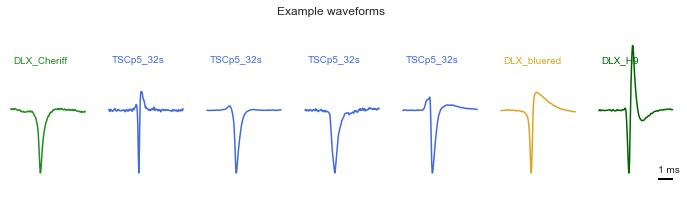

In [9]:
fig, ax = plt.subplots(1,7, figsize=(12,3))
fig.suptitle('Example waveforms')

ax[0] = plot_waveform(index = 15,  ax = ax[0])
ax[1] = plot_waveform(index = 340, ax = ax[1])
ax[2] = plot_waveform(index = 319, ax = ax[2])
ax[3] = plot_waveform(index = 128, ax = ax[3])
ax[4] = plot_waveform(index = 132, ax = ax[4])
ax[5] = plot_waveform(index = 93,  ax = ax[5])
ax[6] = plot_waveform(index = 98,  ax = ax[6])

ax[6].text(x = 120, y= -1, s='1 ms', fontsize=10)
ax[6].hlines(y = -1.1, xmin = 120, xmax = 150, lw=2, color='k') # 30 samples -> 1ms

for myax in ax:
    myax.set_ylim(-1.3,1.3)
    myax.grid()
    myax.axis('off')

In [10]:
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

In [11]:
df2 = df1.copy()
df2 = df2.drop(['organoid', 'color'], axis = 1, inplace=False)

In [12]:
vals = df2.values
vals

array([[ 0.00404354,  0.00325114,  0.00269866, ...,  0.02287388,
         0.02157877,  0.02039814],
       [-0.00580994, -0.00917445, -0.00712291, ...,  0.00510421,
         0.00717398,  0.01331033],
       [ 0.0013642 , -0.00175301, -0.00277123, ...,  0.01743457,
         0.01919919,  0.01894356],
       ...,
       [-0.00517605, -0.00880788,  0.02413192, ...,  0.00994247,
        -0.0093991 , -0.01780297],
       [-0.01500776, -0.0111465 , -0.00099832, ...,  0.05046038,
         0.03761427,  0.01912478],
       [ 0.01552856,  0.01854094,  0.04432342, ..., -0.01840509,
        -0.03506181, -0.0168989 ]])

In [13]:
#Some plots with plotly
index = 15
index2 = 340
index3 = 319
index4 = 98
fig = make_subplots(rows=2, cols=2)
fig.append_trace(go.Scatter(y=vals[index], x=np.arange(len(vals[index])), name=df.iloc[index].organoid), row=1, col=1)
fig.append_trace(go.Scatter(y=vals[index2], x=np.arange(len(vals[index2])), name=df.iloc[index2].organoid), row=1, col=2)
fig.append_trace(go.Scatter(y=vals[index3], x=np.arange(len(vals[index3])), name=df.iloc[index3].organoid), row=2, col=1)
fig.append_trace(go.Scatter(y=vals[index4], x=np.arange(len(vals[index4])), name=df.iloc[index4].organoid), row=2, col=2)
fig.update_layout(title_text='Example waveforms', showlegend=True)
fig.show()